In [1]:
import os
import json
import gzip
import pandas as pd
from urllib.request import urlopen
import sys
import matplotlib.pyplot as plt
import seaborn as sns
# Add the path to the constants file to the system path
sys.path.append('../../')
from constants import *
from path_utils import *

# Get the current directory of the notebook
current_dir = os.path.dirname(os.path.abspath("../../data/amazon-beauty/parse_and_clean_meta_data.ipynb"))
print(f"current directory: {current_dir}")

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
current directory: /Users/tnathu-ai/VSCode/recommender-system/recommender-system-openAI/code/data/amazon-beauty


In [2]:
# Construct the path to data file
data_path = os.path.join(current_dir, 'meta_All_Beauty.json.gz')
print(f'data path: {data_path}')
metadata_df = parse_json_gz(data_path)
# print column names and number of columns
print(f"number of columns: {len(metadata_df.columns)}")
print(f"column names: {metadata_df.columns}")
# number of rows
print(f"number of rows: {len(metadata_df)}")
metadata_df.head(3)


data path: /Users/tnathu-ai/VSCode/recommender-system/recommender-system-openAI/code/data/amazon-beauty/meta_All_Beauty.json.gz


number of columns: 19
column names: Index(['category', 'tech1', 'description', 'fit', 'title', 'also_buy', 'tech2',
       'brand', 'feature', 'rank', 'also_view', 'details', 'main_cat',
       'similar_item', 'date', 'price', 'asin', 'imageURL', 'imageURLHighRes'],
      dtype='object')
number of rows: 32892


,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes
0,[],,[Loud 'N Clear Personal Sound Amplifier allows...,,Loud 'N Clear&trade; Personal Sound Amplifier,[],,idea village,[],"2,938,573 in Beauty & Personal Care (",[],{'ASIN: ': '6546546450'},All Beauty,,,,6546546450,[],[]
1,[],,[No7 Lift & Luminate Triple Action Serum 50ml ...,,No7 Lift &amp; Luminate Triple Action Serum 50...,"[B01E7LCSL6, B008X5RVME]",,,[],"872,854 in Beauty & Personal Care (",[],"{'Shipping Weight:': '0.3 ounces (', 'ASIN: ':...",All Beauty,"class=""a-bordered a-horizontal-stripes a-spa...",,$44.99,7178680776,[],[]
2,[],,[No7 Stay Perfect Foundation now stays perfect...,,No7 Stay Perfect Foundation Cool Vanilla by No7,[],,No7,[],"956,696 in Beauty & Personal Care (","[B01B8BR0O8, B01B8BR0NO, B014MHXXM8]","{'Shipping Weight:': '3.5 ounces (', 'ASIN: ':...",All Beauty,,,$28.76,7250468162,[],[]


In [3]:
## remove rows with unformatted title (i.e. some 'title' may still contain html style content)
df3 = metadata_df.fillna('')
unformatted_df = df3[df3.title.str.contains('getTime')] # unformatted rows
metadata_df = df3[~df3.title.str.contains('getTime')] # filter those unformatted rows
print(len(unformatted_df))
print(len(metadata_df))

0
32892


In [4]:
# Construct the path to data file
data_path = os.path.join(current_dir, 'All_Beauty.json.gz')
print(f'data path: {data_path}')
df = parse_json_gz(data_path)
# print column names and number of columns
print(f"number of columns: {len(df.columns)}")
print(f"column names: {df.columns}")
# number of rows
print(f"number of rows: {len(df)}")
df.head(3)


data path: /Users/tnathu-ai/VSCode/recommender-system/recommender-system-openAI/code/data/amazon-beauty/All_Beauty.json.gz
number of columns: 12
column names: Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'vote',
       'style', 'image'],
      dtype='object')
number of rows: 371345


,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,1.0,True,"02 19, 2015",A1V6B6TNIC10QE,0143026860,theodore j bigham,great,One Star,1424304000,NaN,NaN,NaN
1,4.0,True,"12 18, 2014",A2F5GHSXFQ0W6J,0143026860,Mary K. Byke,My husband wanted to reading about the Negro ...,... to reading about the Negro Baseball and th...,1418860800,NaN,NaN,NaN
2,4.0,True,"08 10, 2014",A1572GUYS7DGSR,0143026860,David G,"This book was very informative, covering all a...",Worth the Read,1407628800,NaN,NaN,NaN


In [5]:
# inner join df and metadata_df
merged_df = pd.merge(df, metadata_df, on='asin', how='inner')

# remove all html tags for all columns
merged_df = merged_df.replace(to_replace='<[^>]+>', value='', regex=True)
# print column names and number of columns
print(f"number of columns: {len(merged_df.columns)}")
print(f"column names: {merged_df.columns}")
# number of rows
print(f"number of rows: {len(merged_df)}")
# number of unique ratings and their values
print(f"number of unique ratings: {len(merged_df['overall'].unique())} and their values: {merged_df['overall'].unique()}")
# print first 3 rows
merged_df.head(3)

number of columns: 30
column names: Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'vote',
       'style', 'image', 'category', 'tech1', 'description', 'fit', 'title',
       'also_buy', 'tech2', 'brand', 'feature', 'rank', 'also_view', 'details',
       'main_cat', 'similar_item', 'date', 'price', 'imageURL',
       'imageURLHighRes'],
      dtype='object')
number of rows: 382532
number of unique ratings: 5 and their values: [5. 4. 1. 3. 2.]


,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,...,feature,rank,also_view,details,main_cat,similar_item,date,price,imageURL,imageURLHighRes
0,5.0,True,"03 10, 2016",A5TA1NJOC0PJ5,7414204790,Amazon Customer,Excellent very good,Five Stars,1457568000,NaN,...,[],"67,701 in Beauty & Personal Care (","[3254895630, B007VL1D9S, B00EH9A0RI, B0773MBG4...","{'Shipping Weight:': '12 ounces (', 'ASIN: ': ...",All Beauty,,,$12.15,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
1,5.0,True,"09 1, 2015",A1TJICB7VLGQKL,7414204790,LH,Great product,Five Stars,1441065600,NaN,...,[],"67,701 in Beauty & Personal Care (","[3254895630, B007VL1D9S, B00EH9A0RI, B0773MBG4...","{'Shipping Weight:': '12 ounces (', 'ASIN: ': ...",All Beauty,,,$12.15,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
2,5.0,True,"10 3, 2014",A80M2286B7STE,7414204790,dolly,Magical,Five Stars,1412294400,NaN,...,[],"67,701 in Beauty & Personal Care (","[3254895630, B007VL1D9S, B00EH9A0RI, B0773MBG4...","{'Shipping Weight:': '12 ounces (', 'ASIN: ': ...",All Beauty,,,$12.15,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...


In [6]:
# Group by 'reviewerID' and filter users with more or equal than 5 ratings
user_counts = merged_df.groupby('reviewerID').size()
users_with_more_than_5_ratings = user_counts[user_counts >= 5].index

# Instead of randomly sampling 5 users, we'll use all users that have rated products more than 5 times
selected_users = users_with_more_than_5_ratings.tolist()

# Filter the original dataframe to include only records of these users
merged_df = merged_df[merged_df['reviewerID'].isin(selected_users)]

# Rename the 'overall' column to 'rating': rating of the product
merged_df = merged_df.rename(columns={'overall': 'rating'})

# Display the number of rows, columns, and column names
print(f"column names: {merged_df.columns}")
print(f"number of columns: {len(merged_df.columns)}")
print(f"number of rows: {len(merged_df)}")

# Print the first 3 rows
merged_df.head(3)


column names: Index(['rating', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'vote',
       'style', 'image', 'category', 'tech1', 'description', 'fit', 'title',
       'also_buy', 'tech2', 'brand', 'feature', 'rank', 'also_view', 'details',
       'main_cat', 'similar_item', 'date', 'price', 'imageURL',
       'imageURLHighRes'],
      dtype='object')
number of columns: 30
number of rows: 9767


,rating,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,...,feature,rank,also_view,details,main_cat,similar_item,date,price,imageURL,imageURLHighRes
64,1.0,False,"08 25, 2015",A2RYSCZOPEXOCQ,9790787006,The Cat Next Door,"I use a lot of perfume, I go through a new bot...",This is not going to be my favorite scent.,1440460800,NaN,...,[],"298,893 in Beauty &amp; Personal Care (","[B00357FTX8, B01NBID7FJ, B0017JT658]","{'Shipping Weight:': '12.8 ounces (', 'ASIN: '...",All Beauty,,,$13.85,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
131,5.0,False,"06 8, 2001",A141OPVE376YFI,B000050B65,Paul G.,"First, a little background. I've switched bet...","Finally, a razor that lives up to the ads",991958400,81,...,[],"2,639,859 in Beauty & Personal Care (","[B01B1O9DOM, B00JITDVD2, B01KXV16DK, B00AEINQ9...",{},All Beauty,,,,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
132,5.0,False,"06 8, 2001",A141OPVE376YFI,B000050B65,Paul G.,"First, a little background. I've switched bet...","Finally, a razor that lives up to the ads",991958400,81,...,[],"2,639,859 in Beauty & Personal Care (","[B01B1O9DOM, B00JITDVD2, B01KXV16DK, B00AEINQ9...",{},All Beauty,,,,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...


In [7]:
# rename overall column to rating: rating of the product
merged_df = merged_df.rename(columns={'overall': 'rating'})
# Handle Missing Values
# 'rating' is an important column
merged_df = merged_df.dropna(subset=['rating'])
merged_df['rating'] = merged_df['rating'].astype(float)

# remove all html tags for all columns
merged_df = merged_df.replace(to_replace='<[^>]+>', value='', regex=True)

# Rank Cleanup
merged_df['rank'] = merged_df['rank'].str.extract(r'(\d+)').astype(float)

# Price Formatting
merged_df['price'] = pd.to_numeric(merged_df['price'].str.replace('$', '', regex=False), errors='coerce')

# Date Formatting
merged_df['reviewTime'] = pd.to_datetime(merged_df['reviewTime'])
merged_df['unixReviewTime'] = pd.to_datetime(merged_df['unixReviewTime'], unit='s')

# Convert Boolean
merged_df['verified'] = merged_df['verified'].astype(bool)

# Parse JSON or Nested Fields
def parse_json_or_list(column):
    try:
        return json.loads(column.replace("'", "\""))
    except:
        return column

json_columns = ['style', 'feature', 'also_buy', 'also_view']
for col in json_columns:
    merged_df[col] = merged_df[col].apply(parse_json_or_list)

# Handle URLs and Image Links from items, and image from users
merged_df = merged_df.drop(columns=['imageURL', 'imageURLHighRes', 'image'])

# # Remove Duplicate Rows
# merged_df = merged_df.drop_duplicates()

# number of rows and columns and column names
print(f"column names: {merged_df.columns}")
print(f"number of columns: {len(merged_df.columns)}")
print(f"number of rows: {len(merged_df)}")
# print first 3 rows
merged_df.head(3)

column names: Index(['rating', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'vote',
       'style', 'category', 'tech1', 'description', 'fit', 'title', 'also_buy',
       'tech2', 'brand', 'feature', 'rank', 'also_view', 'details', 'main_cat',
       'similar_item', 'date', 'price'],
      dtype='object')
number of columns: 27
number of rows: 9767


,rating,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,...,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price
64,1.0,False,2015-08-25,A2RYSCZOPEXOCQ,9790787006,The Cat Next Door,"I use a lot of perfume, I go through a new bot...",This is not going to be my favorite scent.,2015-08-25,NaN,...,,Jenna Jameson,[],298.0,"[B00357FTX8, B01NBID7FJ, B0017JT658]","{'Shipping Weight:': '12.8 ounces (', 'ASIN: '...",All Beauty,,,13.85
131,5.0,False,2001-06-08,A141OPVE376YFI,B000050B65,Paul G.,"First, a little background. I've switched bet...","Finally, a razor that lives up to the ads",2001-06-08,81,...,,Norelco,[],2.0,"[B01B1O9DOM, B00JITDVD2, B01KXV16DK, B00AEINQ9...",{},All Beauty,,,NaN
132,5.0,False,2001-06-08,A141OPVE376YFI,B000050B65,Paul G.,"First, a little background. I've switched bet...","Finally, a razor that lives up to the ads",2001-06-08,81,...,,Norelco,[],2.0,"[B01B1O9DOM, B00JITDVD2, B01KXV16DK, B00AEINQ9...",{},All Beauty,,,NaN


In [8]:
merged_df

,rating,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,...,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price
64,1.0,False,2015-08-25,A2RYSCZOPEXOCQ,9790787006,The Cat Next Door,"I use a lot of perfume, I go through a new bot...",This is not going to be my favorite scent.,2015-08-25,NaN,...,,Jenna Jameson,[],298.0,"[B00357FTX8, B01NBID7FJ, B0017JT658]","{'Shipping Weight:': '12.8 ounces (', 'ASIN: '...",All Beauty,,,13.85
131,5.0,False,2001-06-08,A141OPVE376YFI,B000050B65,Paul G.,"First, a little background. I've switched bet...","Finally, a razor that lives up to the ads",2001-06-08,81,...,,Norelco,[],2.0,"[B01B1O9DOM, B00JITDVD2, B01KXV16DK, B00AEINQ9...",{},All Beauty,,,NaN
132,5.0,False,2001-06-08,A141OPVE376YFI,B000050B65,Paul G.,"First, a little background. I've switched bet...","Finally, a razor that lives up to the ads",2001-06-08,81,...,,Norelco,[],2.0,"[B01B1O9DOM, B00JITDVD2, B01KXV16DK, B00AEINQ9...",{},All Beauty,,,NaN
505,5.0,True,2008-07-25,A1TVTDKNMSQ7XU,B000050B6B,Grandpa Pipes,I've had many Norelco razors in my 50 years of...,Just like new.....,2008-07-25,NaN,...,,Philips Norelco,[],148.0,"[B001IA0PCY, B00196W5S4, B004URZADG, B07B4WQHQ...",{' Product Dimensions: ': '5.1 x 0.3 ...,All Beauty,,,64.50
506,5.0,True,2008-07-25,A1TVTDKNMSQ7XU,B000050B6B,Grandpa Pipes,I've had many Norelco razors in my 50 years of...,Just like new.....,2008-07-25,NaN,...,,Philips Norelco,[],148.0,"[B001IA0PCY, B00196W5S4, B004URZADG, B07B4WQHQ...",{' Product Dimensions: ': '5.1 x 0.3 ...,All Beauty,,,64.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381992,4.0,False,2016-09-20,A2GJX2KCUSR0EI,B01H4LWGIG,Sneaky Burrito,I try to use a sheet mask at least 5 times a w...,moisturizing and soothing and has lots of anti...,2016-09-20,2,...,,,[],2.0,[],{'ASIN: ': 'B01H4LWGIG'},All Beauty,,,NaN
381999,3.0,True,2016-07-25,AC00X2B6MK4AZ,B01H4IQHDO,Maria G Guzman,good,Three Stars,2016-07-25,NaN,...,,Cellto,[],759.0,[],"{'Shipping Weight:': '1.2 pounds', 'Domestic S...",All Beauty,,,NaN
382009,5.0,False,2016-07-10,AAJSS6CLCYC0M,B01H4Y9MSU,J,I am an avid hair-straightener. I bought this ...,"Bought for traveling, but will use daily.",2016-07-10,NaN,...,,Flyoneer,[],888.0,[],{' Product Dimensions: ': '12.8 x 1.2...,All Beauty,,,NaN
382240,5.0,True,2017-06-16,A3RD5N83RL45C1,B01HBWYB5Y,Breezy,Wonderful creams and really cute bag,revetin,2017-06-16,NaN,...,,,[],2.0,[],{'ASIN: ': 'B01HBWYB5Y'},All Beauty,,,NaN


In [9]:
# view duplicate rows
print(f"Number of duplicate rows: {len(merged_df[merged_df.duplicated(subset=['reviewerID', 'asin', 'rating'], keep=False)])}")

# drop duplicate rows
merged_df = merged_df.drop_duplicates(subset=['reviewerID', 'asin', 'rating'], keep='first')
print(f"number of rows: {len(merged_df)}")


Number of duplicate rows: 4365
number of rows: 7502


In [10]:
# Save merged_df to a CSV in the appropriate directory
merged_df.to_csv('../../data/amazon-beauty/large_merged_data.csv', index=False)
print('Saved merged_df to csv to appropriate directory!')

Saved merged_df to csv to appropriate directory!


In [11]:
# explore data
# number of unique users
print(f"number of unique users: {len(merged_df['reviewerID'].unique())}\n\n")

# number of unique title
print(f"number of unique title: {len(merged_df['title'].unique())}\n\n")

# number of unique products
print(f"number of unique products: {len(merged_df['asin'].unique())}\n\n")

# number of unique ratings and their values
print(f"number of unique ratings: {len(merged_df['rating'].unique())} and their values: {merged_df['rating'].unique()}\n\n")

# number of unique categories
# print(f"number of unique categories: {len(merged_df['category'].unique())} and their values: {merged_df['category'].unique()}\n\n") 

# number of unique reviewText
print(f"number of unique reviewText: {len(merged_df['reviewText'].unique())} and their values: {merged_df['reviewText'].unique()}\n\n")

# number of unique descriptions
# print(f"number of unique descriptions: {len(merged_df['description'].unique())} and their values: {merged_df['description'].unique()}\n\n")

# number of unique verified
print(f"number of unique verified: {len(merged_df['verified'].unique())} and their values: {merged_df['verified'].unique()}\n")
# each unique verified value and their counts
print(f"unique verified value counts: {merged_df['verified'].value_counts()}\n\n")


number of unique users: 1608


number of unique title: 1869


number of unique products: 1879


number of unique ratings: 5 and their values: [1. 5. 4. 2. 3.]


number of unique reviewText: 4006 and their values: ['I use a lot of perfume, I go through a new bottle every couple of weeks, and I never bought the same scent twice. I`m still looking for my favorite scent. This is not going to be it. I`m going to use it, but definitely not purchase again. Someone else may like it, it just does not lure my scents. Bottle is a very pretty, red glass, and it smells classier, than the name suggests.\n\nI got this for evaluation, 50% off, in order that I might provide this review.\n\n* I originally gave this 3 stars, but as I tried to use this further, I found the smell being just completely wrong. I asked three friends separately, what they think of it, and each one said, that this smells manly. And that was the exact word I was looking for. First two girls did not want to take this from me for 

# Exploration

In [12]:
import random
import numpy as np
import openai
import pandas as pd
import os
import sys

# Add the path to the constants file to the system path
sys.path.append('../../')
from constants import *

from path_utils import *
# source code folder path
rec_sys_dir = get_rec_sys_directory()
print(f"Rec-sys directory: {rec_sys_dir}")

# data folder path
DATA_DIR = os.path.join(rec_sys_dir, 'data')
print(f"Data directory: {DATA_DIR}")

# data path
data_path = os.path.join(DATA_DIR, 'amazon-beauty/large_merged_data.csv')
print(f'Data path: {data_path}')



data = pd.read_csv(data_path)
# print column names and number of columns
print(f"number of columns: {len(data.columns)} and column names: {data.columns}")
data.head(3)


Rec-sys directory: /Users/tnathu-ai/VSCode/recommender-system/recommender-system-openAI/code
Data directory: /Users/tnathu-ai/VSCode/recommender-system/recommender-system-openAI/code/data
Data path: /Users/tnathu-ai/VSCode/recommender-system/recommender-system-openAI/code/data/amazon-beauty/large_merged_data.csv
number of columns: 27 and column names: Index(['rating', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'vote',
       'style', 'category', 'tech1', 'description', 'fit', 'title', 'also_buy',
       'tech2', 'brand', 'feature', 'rank', 'also_view', 'details', 'main_cat',
       'similar_item', 'date', 'price'],
      dtype='object')


,rating,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,...,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price
0,1.0,False,2015-08-25,A2RYSCZOPEXOCQ,9790787006,The Cat Next Door,"I use a lot of perfume, I go through a new bot...",This is not going to be my favorite scent.,2015-08-25,NaN,...,NaN,Jenna Jameson,[],298.0,"['B00357FTX8', 'B01NBID7FJ', 'B0017JT658']","{'Shipping Weight:': '12.8 ounces (', 'ASIN: '...",All Beauty,NaN,NaN,13.85
1,5.0,False,2001-06-08,A141OPVE376YFI,B000050B65,Paul G.,"First, a little background. I've switched bet...","Finally, a razor that lives up to the ads",2001-06-08,81,...,NaN,Norelco,[],2.0,"['B01B1O9DOM', 'B00JITDVD2', 'B01KXV16DK', 'B0...",{},All Beauty,NaN,NaN,NaN
2,5.0,True,2008-07-25,A1TVTDKNMSQ7XU,B000050B6B,Grandpa Pipes,I've had many Norelco razors in my 50 years of...,Just like new.....,2008-07-25,NaN,...,NaN,Philips Norelco,[],148.0,"['B001IA0PCY', 'B00196W5S4', 'B004URZADG', 'B0...",{'\n Product Dimensions: \n ': '5.1 x 0....,All Beauty,NaN,NaN,64.50


In [13]:
# Filter the DataFrame for the specific user and product title
filtered_data = data[(data['reviewerID'] == 'A141OPVE376YFI') & (data['title'] == 'Philips Norelco BG2020 BodyGroom')]

# Check if there are any matching rows and print the rating
if not filtered_data.empty:
    rating = filtered_data['rating'].iloc[0]
    print(f"The ACTUAL rating given by user A141OPVE376YFI for the product 'Philips Norelco BG2020 BodyGroom' is {rating}.")
else:
    print("No matching records found.")


The ACTUAL rating given by user A141OPVE376YFI for the product 'Philips Norelco BG2020 BodyGroom' is 4.0.


In [14]:
# rows has missing reviewText
missing_reviewText = data[data['reviewText'].isnull()]

missing_reviewText

,rating,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,...,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price
473,5.0,True,2015-02-28,A3DA9MP7OGLPC0,B00006L9LC,verenice,NaN,Five Stars,2015-02-28,NaN,...,NaN,Citre Shine,[],1.0,[],"{'ASIN: ': 'B00006L9LC', 'UPC:': '795827187965...",All Beauty,NaN,NaN,23.0
2438,5.0,True,2015-02-28,A3DA9MP7OGLPC0,B000URXP6E,verenice,NaN,Five Stars,2015-02-28,NaN,...,NaN,Bonne Bell,[],1.0,[],"{'Shipping Weight:': '1.8 pounds', 'Domestic S...",All Beauty,NaN,NaN,NaN
3469,5.0,True,2015-02-28,A3DA9MP7OGLPC0,B0012Y0ZG2,verenice,NaN,Five Stars,2015-02-28,NaN,...,NaN,Bath & Body Works,[],1.0,[],"{'\n Item Weight: \n ': '8.5 ounces', 'S...",All Beauty,NaN,NaN,NaN
4437,5.0,True,2015-02-28,A3DA9MP7OGLPC0,B001OHV1H4,verenice,NaN,Five Stars,2015-02-28,NaN,...,NaN,Avalon,[],643.0,[],{'\n Product Dimensions: \n ': '7.2 x 3 ...,All Beauty,NaN,NaN,NaN
6342,5.0,True,2017-01-04,A1PU2JDYYIXS0E,B01DU6WN3C,Malinda,NaN,"Good quality, beautiful colors, long wear",2017-01-04,NaN,...,NaN,NaN,[],490.0,[],"{'\n Item Weight: \n ': '3.84 ounces', '...",All Beauty,NaN,NaN,NaN
6699,5.0,True,2015-02-28,A3DA9MP7OGLPC0,B00BHMAOAQ,verenice,NaN,Five Stars,2015-02-28,NaN,...,NaN,Deity America,[],862.0,[],"{'Shipping Weight:': '4.5 pounds', 'ASIN: ': '...",All Beauty,NaN,NaN,NaN


In [15]:
import pandas as pd

# Step 1: Count the number of reviews per item
item_popularity = data['asin'].value_counts()

# Step 2: Sort these counts in descending order
item_popularity_sorted = item_popularity.sort_values(ascending=False)

# Step 3: Select the top 20% of the items
top_20_percent_cutoff = int(len(item_popularity_sorted) * 0.2)
top_20_percent_items = item_popularity_sorted.head(top_20_percent_cutoff)

# Get a DataFrame of only the top 20% most popular items
popular_items_data = data[data['asin'].isin(top_20_percent_items.index)]

# You might want to see the details
popular_items_data.head()


,rating,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,...,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price
3,4.0,True,2018-02-09,A3J0LOCVOIEDNE,B000050FDY,LouRevue,Works great and keeps my Braun shaver working/...,Four Stars,2018-02-09,NaN,...,NaN,Braun,[],1.0,"['B000KND8IS', 'B07L9PW8R3', 'B071KCNQTR', 'B0...",{},All Beauty,NaN,NaN,11.94
4,5.0,True,2018-01-14,AD1WVH9MP1ZS6,B000050FDY,SpecialK,"Cleans my shaver pretty well. A bit pricey, bu...",Five Stars,2018-01-14,NaN,...,NaN,Braun,[],1.0,"['B000KND8IS', 'B07L9PW8R3', 'B071KCNQTR', 'B0...",{},All Beauty,NaN,NaN,11.94
5,4.0,True,2017-12-19,AI6UBVJ1SXJEJ,B000050FDY,windy harbor,I just wish they would last longer.,Four Stars,2017-12-19,NaN,...,NaN,Braun,[],1.0,"['B000KND8IS', 'B07L9PW8R3', 'B071KCNQTR', 'B0...",{},All Beauty,NaN,NaN,11.94
6,4.0,True,2017-12-08,AVWIQEW3S4K7Z,B000050FDY,Christine,This makes cleaning the shaver so easy.,Four Stars,2017-12-08,NaN,...,NaN,Braun,[],1.0,"['B000KND8IS', 'B07L9PW8R3', 'B071KCNQTR', 'B0...",{},All Beauty,NaN,NaN,11.94
7,5.0,False,2017-11-30,A2AHHKQAG09J41,B000050FDY,Jimmy Leon,Works great.,Braun refill,2017-11-30,NaN,...,NaN,Braun,[],1.0,"['B000KND8IS', 'B07L9PW8R3', 'B071KCNQTR', 'B0...",{},All Beauty,NaN,NaN,11.94


In [16]:
# Preprocessing
# Step 0: Drop rows where 'asin' is null as these do not correspond to a valid item review
data = data.dropna(subset=['asin'])

# Verify that 'reviewText' or another relevant column that must contain review data is not empty
data = data.dropna(subset=['reviewText'])

# Step 1: Count the number of reviews per item
item_popularity = data['asin'].value_counts()

# Step 2: Sort these counts in descending order
item_popularity_sorted = item_popularity.sort_values(ascending=False)

# Step 3: Select the top 20% of the items
top_20_percent_cutoff = int(len(item_popularity_sorted) * 0.2)
top_20_percent_items = item_popularity_sorted.head(top_20_percent_cutoff)

# Get a DataFrame of only the top 20% most popular items
popular_items_data = data[data['asin'].isin(top_20_percent_items.index)]

# You might want to see the details
popular_items_data.head()


,rating,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,...,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price
3,4.0,True,2018-02-09,A3J0LOCVOIEDNE,B000050FDY,LouRevue,Works great and keeps my Braun shaver working/...,Four Stars,2018-02-09,NaN,...,NaN,Braun,[],1.0,"['B000KND8IS', 'B07L9PW8R3', 'B071KCNQTR', 'B0...",{},All Beauty,NaN,NaN,11.94
4,5.0,True,2018-01-14,AD1WVH9MP1ZS6,B000050FDY,SpecialK,"Cleans my shaver pretty well. A bit pricey, bu...",Five Stars,2018-01-14,NaN,...,NaN,Braun,[],1.0,"['B000KND8IS', 'B07L9PW8R3', 'B071KCNQTR', 'B0...",{},All Beauty,NaN,NaN,11.94
5,4.0,True,2017-12-19,AI6UBVJ1SXJEJ,B000050FDY,windy harbor,I just wish they would last longer.,Four Stars,2017-12-19,NaN,...,NaN,Braun,[],1.0,"['B000KND8IS', 'B07L9PW8R3', 'B071KCNQTR', 'B0...",{},All Beauty,NaN,NaN,11.94
6,4.0,True,2017-12-08,AVWIQEW3S4K7Z,B000050FDY,Christine,This makes cleaning the shaver so easy.,Four Stars,2017-12-08,NaN,...,NaN,Braun,[],1.0,"['B000KND8IS', 'B07L9PW8R3', 'B071KCNQTR', 'B0...",{},All Beauty,NaN,NaN,11.94
7,5.0,False,2017-11-30,A2AHHKQAG09J41,B000050FDY,Jimmy Leon,Works great.,Braun refill,2017-11-30,NaN,...,NaN,Braun,[],1.0,"['B000KND8IS', 'B07L9PW8R3', 'B071KCNQTR', 'B0...",{},All Beauty,NaN,NaN,11.94


In [17]:

# Preprocessing
# Step 0: Drop rows where 'asin' is null as these do not correspond to a valid item review
data = data.dropna(subset=['asin'])

# Verify that 'reviewText' or another relevant column that must contain review data is not empty
# Adjust the column name as necessary based on  dataset specifics
data = data.dropna(subset=['reviewText'])

# Step 1: Count the number of reviews per item
item_popularity = data['asin'].value_counts()

# Step 2: Sort these counts in descending order
item_popularity_sorted = item_popularity.sort_values(ascending=False)

# Step 3: Select the top 20% of the items
top_20_percent_cutoff = int(len(item_popularity_sorted) * 0.2)
top_20_percent_items = item_popularity_sorted.head(top_20_percent_cutoff)

# Get a DataFrame of only the top 20% most popular items
popular_items_data = data[data['asin'].isin(top_20_percent_items.index)]

# You might want to see the details
popular_items_data.head()


,rating,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,...,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price
3,4.0,True,2018-02-09,A3J0LOCVOIEDNE,B000050FDY,LouRevue,Works great and keeps my Braun shaver working/...,Four Stars,2018-02-09,NaN,...,NaN,Braun,[],1.0,"['B000KND8IS', 'B07L9PW8R3', 'B071KCNQTR', 'B0...",{},All Beauty,NaN,NaN,11.94
4,5.0,True,2018-01-14,AD1WVH9MP1ZS6,B000050FDY,SpecialK,"Cleans my shaver pretty well. A bit pricey, bu...",Five Stars,2018-01-14,NaN,...,NaN,Braun,[],1.0,"['B000KND8IS', 'B07L9PW8R3', 'B071KCNQTR', 'B0...",{},All Beauty,NaN,NaN,11.94
5,4.0,True,2017-12-19,AI6UBVJ1SXJEJ,B000050FDY,windy harbor,I just wish they would last longer.,Four Stars,2017-12-19,NaN,...,NaN,Braun,[],1.0,"['B000KND8IS', 'B07L9PW8R3', 'B071KCNQTR', 'B0...",{},All Beauty,NaN,NaN,11.94
6,4.0,True,2017-12-08,AVWIQEW3S4K7Z,B000050FDY,Christine,This makes cleaning the shaver so easy.,Four Stars,2017-12-08,NaN,...,NaN,Braun,[],1.0,"['B000KND8IS', 'B07L9PW8R3', 'B071KCNQTR', 'B0...",{},All Beauty,NaN,NaN,11.94
7,5.0,False,2017-11-30,A2AHHKQAG09J41,B000050FDY,Jimmy Leon,Works great.,Braun refill,2017-11-30,NaN,...,NaN,Braun,[],1.0,"['B000KND8IS', 'B07L9PW8R3', 'B071KCNQTR', 'B0...",{},All Beauty,NaN,NaN,11.94


Number of unique users: 1607
Number of unique products: 1879
Total number of ratings: 7496
Average number of ratings per user: 4.66
Sparsity of the interaction matrix: 0.9975


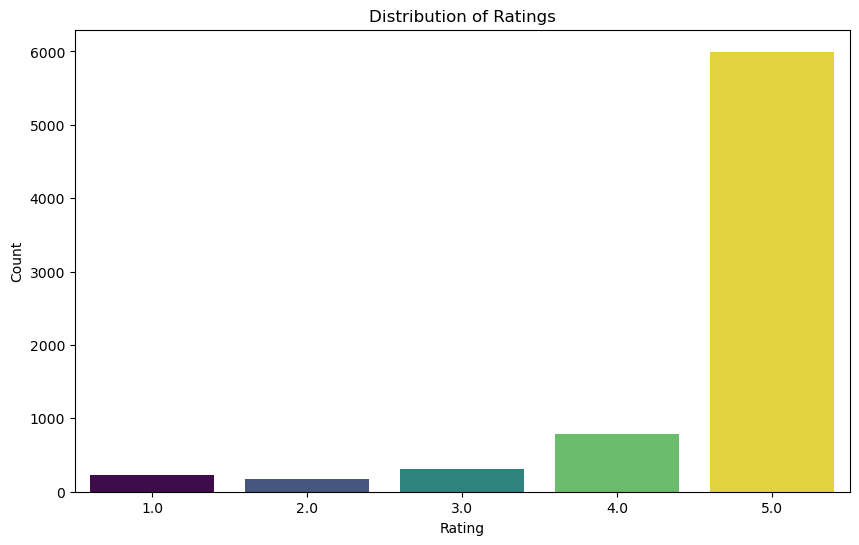

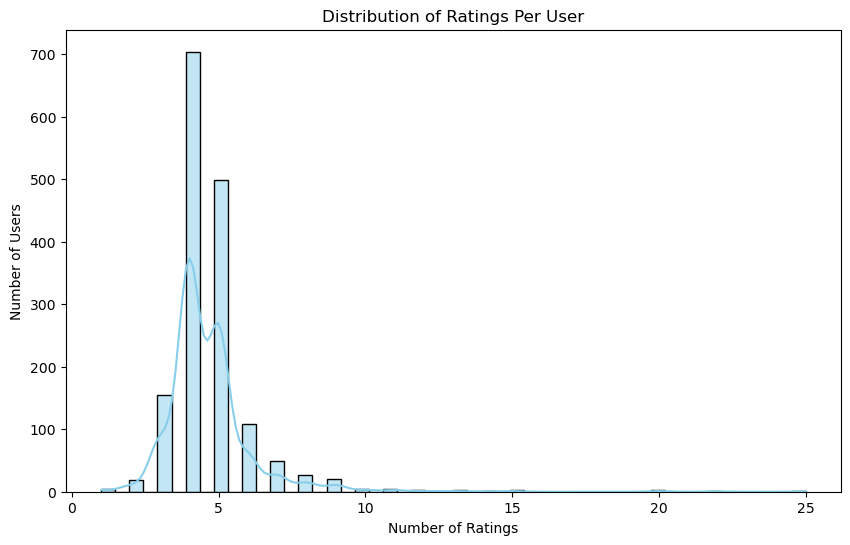

Number of duplicate rows: 0


In [21]:

# Specify the directory to save the images
output_dir = '/Users/tnathu-ai/VSCode/recommender-system/recommender-system-openAI/code/notebook/images/statistic'
os.makedirs(output_dir, exist_ok=True)  # Create the directory if it doesn't exist

# Calculate additional statistics for analysis
unique_users = len(data['reviewerID'].unique())
unique_products = len(data['asin'].unique())
total_ratings = len(data)
average_ratings_per_user = total_ratings / unique_users
sparsity = 1.0 - (total_ratings / float(unique_users * unique_products))

# Print the calculated statistics
print(f"Number of unique users: {unique_users}")
print(f"Number of unique products: {unique_products}")
print(f"Total number of ratings: {total_ratings}")
print(f"Average number of ratings per user: {average_ratings_per_user:.2f}")
print(f"Sparsity of the interaction matrix: {sparsity:.4f}")

# Visualize the distribution of ratings using seaborn
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=data, hue='rating', palette='viridis', dodge=False, legend=False)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
# Save the figure
plt.savefig(os.path.join(output_dir, 'Distribution_Ratings_Amazon.png'))
plt.show()

# Visualize the distribution of ratings per user
user_ratings_count = data['reviewerID'].value_counts()
plt.figure(figsize=(10, 6))
sns.histplot(user_ratings_count, bins=50, kde=True, color='skyblue')
plt.title('Distribution of Ratings Per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Users')
# Save the figure
plt.savefig(os.path.join(output_dir, 'Distribution_Ratings_Per_User_Amazon.png'))
plt.show()

# Check for duplicate rows in the dataset
num_duplicate_rows = len(data[data.duplicated(subset=['reviewerID', 'asin', 'rating'], keep=False)])
print(f"Number of duplicate rows: {num_duplicate_rows}")


# References

Justifying recommendations using distantly-labeled reviews and fined-grained aspects
Jianmo Ni, Jiacheng Li, Julian McAuley
Empirical Methods in Natural Language Processing (EMNLP), 2019
pdf: https://cseweb.ucsd.edu/~jmcauley/datasets/amazon_v2/